In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import tool.jieba as jieba
jieba.set_dictionary('model/dict.txt.big')
jieba.load_userdict("model/userdict.txt")

Building prefix dict from c:\Users\w95wa\Workspace\data_prepocessing\model\dict.txt.big ...
Dumping model to file cache C:\Users\w95wa\AppData\Local\Temp\jieba.u7158e86d5425355f1166f40cb986196f.cache
Loading model cost 1.083 seconds.
Prefix dict has been built succesfully.


In [12]:
from gensim.models import word2vec
from gensim.similarities import MatrixSimilarity 
from gensim.matutils import Dense2Corpus

In [ ]:
rwd = np.load('model/Rwd_l.npy', allow_pickle=True).item()

http_part = "[a-zA-Z]+"
main_part = "[a-zA-Z0-9_]+(?:(?:\.|-)[a-zA-Z0-9_]+)*"
sub_part =  "(?:[\+%\.\-a-zA-Z0-9_]*/?)*"
get_part = "(?:&?[a-zA-Z0-9_]+(?:(?:\.|-)[a-zA-Z0-9_]+)*" + "=" + "[\+%\.\-a-zA-Z0-9_]*)*"

repl_URL = list(map(lambda x: re.sub(http_part+"://"+main_part+"/?"+sub_part+"\??"+get_part," URL ",x),rwd.values()))
stop_word = [' ', '，', '嗎', '請問', '有', '是', '提供', '什麼','您','的','呢','？','?','就','了','您好','目前','不好意思']
temp = list(map(lambda ct: tuple(filter(lambda x: not x in stop_word ,(ch for ch in jieba.cut(ct)))), repl_URL))
temp2 = list(map(lambda ct: tuple(filter(lambda x: x!=' ' ,(ch for ch in jieba.cut(ct)))), repl_URL))
len(list(set(temp))),len(list(set(temp2)))
listingContent = set(tuple(list(zip(temp,temp2))))

# listingContent = list(filter(lambda ct: 30>len(list(filter(lambda ch: isChineseChr(ch), ct)))>4, listingContent))

listingContent = list(filter(lambda ct: 30>len(ct[0])>2, listingContent))



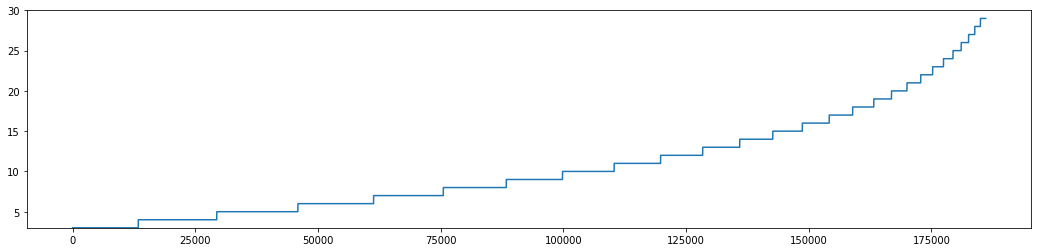

In [14]:
plt.figure(figsize=(18,4))
plt.ylim((3,30))
plt.plot(sorted(list(map(lambda x: len(x[0]), listingContent))))
plt.show()

In [16]:
model = word2vec.Word2Vec(list(zip(* listingContent))[0], vector_size=128, min_count=0,sg=1,negative=5)
model.save("word2vec.model")

In [18]:
lC2dic = {}
for st in listingContent:
    for wd in st[0]:
        lC2dic[wd] = lC2dic.get(wd,0)+1

In [19]:
wd_list = np.array(list(lC2dic.keys()))

In [23]:
model.wv.vocab

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [24]:
vt_list = np.array(list(map(lambda k: model.wv[k],wd_list)))

In [25]:
vt_list

array([[ 0.19669802,  0.11536925,  0.23946902, ..., -0.19572103,
        -0.19331962,  0.13483955],
       [ 0.47630432, -0.30123103, -0.13458751, ..., -0.5192741 ,
         0.03751205, -0.04734095],
       [-0.265824  , -0.41481987,  0.20324759, ..., -0.34260213,
        -0.00074508,  0.17486396],
       ...,
       [ 0.0537914 , -0.03365187,  0.01893811, ..., -0.01342981,
        -0.01070716, -0.05644265],
       [ 0.03149066, -0.08290169, -0.02003654, ..., -0.01955416,
        -0.0411205 , -0.05114942],
       [ 0.04321417, -0.0901835 ,  0.01720305, ..., -0.01796239,
        -0.03086703, -0.09159239]], dtype=float32)